# Airline Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [2]:
flight = pd.read_csv('flight.csv')

In [3]:
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


In [4]:
columns = flight.columns.tolist()

In [5]:
print(columns)

['miles', 'passengers', 'delay', 'inflight_meal', 'inflight_entertainment', 'inflight_wifi', 'day_of_week', 'redeye', 'weekend', 'coach_price', 'firstclass_price', 'hours']


## Univariate Analysis 

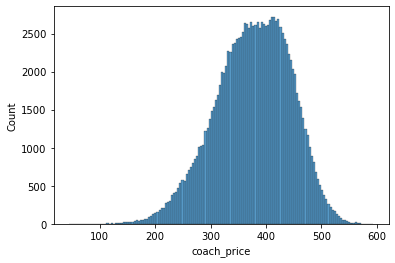

<Figure size 432x288 with 0 Axes>

In [6]:
# Analysing (coach_price) colum 

sns.histplot(flight['coach_price'])
plt.show()
plt.clf()

In [7]:
# Calculating mean price of (coach_price)

mean_price = flight['coach_price'].mean()
print(mean_price)

376.5852530821279


In [8]:
# Calculating median price of (coach_price)

median_price = flight['coach_price'].median()
print(median_price)

380.56


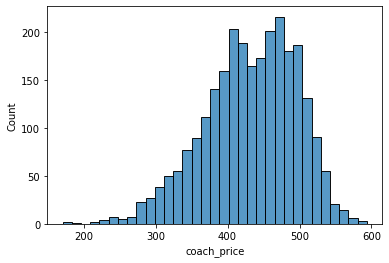

<Figure size 432x288 with 0 Axes>

In [9]:
# Visulaizing coach ticket price for flights that are 8 hours long

sns.histplot(flight.coach_price[flight.hours == 8])
plt.show()
plt.clf()

In [10]:
# Calculating mean price of (coach_price) flight over 8 (hours).

mean_hour_price = np.mean(flight.coach_price[flight.hours == 8])
print(mean_hour_price)

431.8343773728164


In [11]:
# Calculating median price of (coach_price) flight over 8 (hours).

median_hour_price = np.median(flight.coach_price[flight.hours == 8])
print(median_hour_price)

437.115


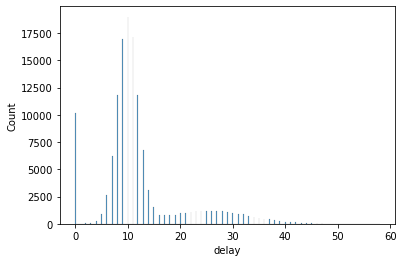

<Figure size 432x288 with 0 Axes>

In [16]:
# visulaizing flight delay time (in minutes) which could effect conecting flights.

sns.histplot(flight.delay[flight.delay < 500])
plt.show()
plt.clf()

## Bivariate Analysis 

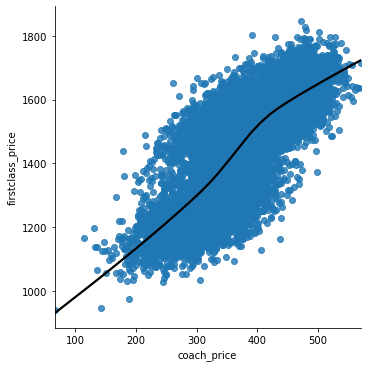

<Figure size 432x288 with 0 Axes>

In [17]:
# Flight data conver into subdata small portion of total data.

perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
 
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

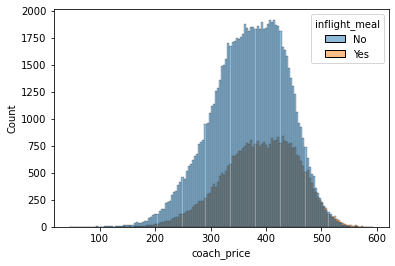

<Figure size 432x288 with 0 Axes>

In [18]:
# Inflight Meals

sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

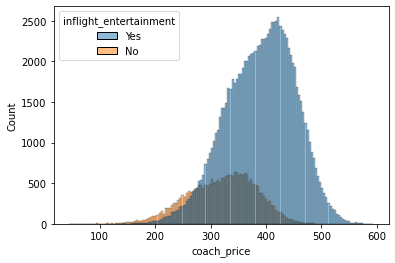

<Figure size 432x288 with 0 Axes>

In [19]:
# Inflight Entertainment

sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

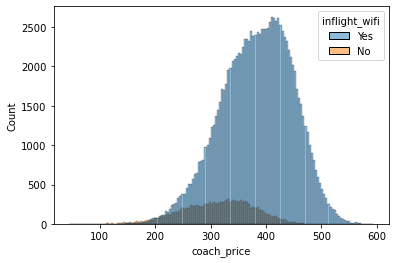

<Figure size 432x288 with 0 Axes>

In [20]:
# Inflight WiFi

sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()

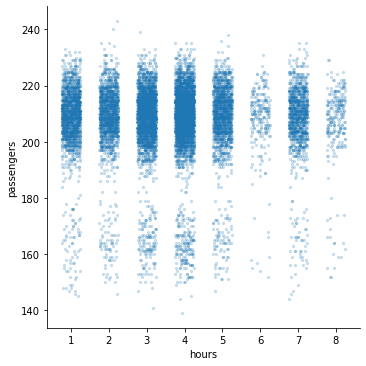

<Figure size 432x288 with 0 Axes>

In [22]:
# does the number of passengers change in relation to the length of flights
sns.lmplot(x = "hours", y = "passengers", 
           data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

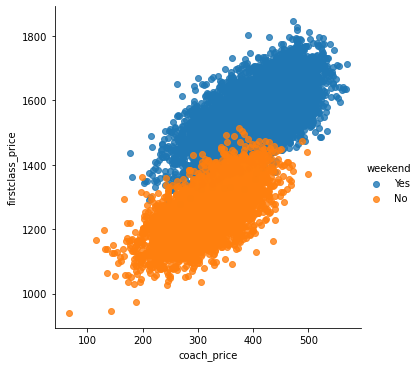

<Figure size 432x288 with 0 Axes>

In [27]:
# coach and first-class prices on weekends compared to weekdays.

sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()
plt.clf()

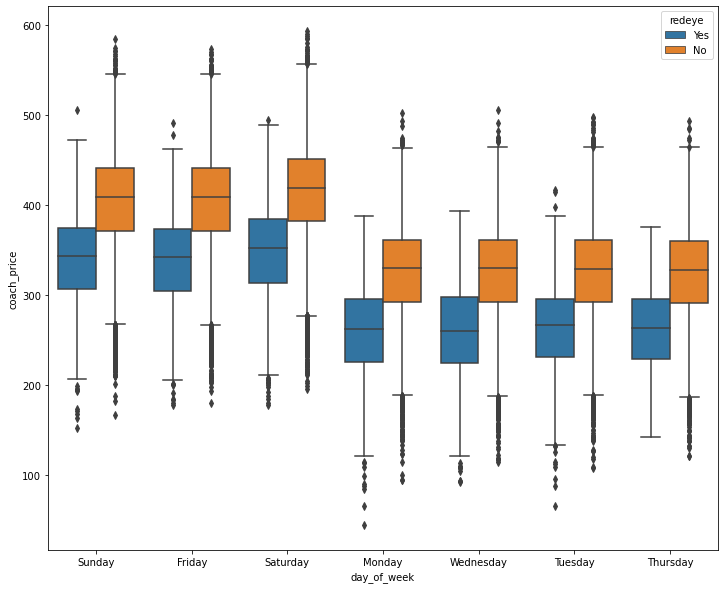

<Figure size 432x288 with 0 Axes>

In [28]:
# How do coach prices differ for redeyes and non-redeyes on each day of the week?
plt.figure(figsize=(12,10))
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()